In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import joblib

In [2]:
data = pd.read_csv("USDT-USD.csv")

In [3]:
data.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,1.01087,1.01327,0.996515,1.00818,1.00818,358188000.0
1,2017-11-10,1.00650,1.02423,0.995486,1.00601,1.00601,756446016.0
2,2017-11-11,1.00598,1.02621,0.995799,1.00899,1.00899,746227968.0


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1822 non-null   object 
 1   Open       1821 non-null   float64
 2   High       1821 non-null   float64
 3   Low        1821 non-null   float64
 4   Close      1821 non-null   float64
 5   Adj Close  1821 non-null   float64
 6   Volume     1821 non-null   float64
dtypes: float64(6), object(1)
memory usage: 99.8+ KB


In [6]:
data.dropna(inplace=True)
c1 = data['Date'].to_list()
c2 = data['Close'].to_list()
data = list(zip(c1,c2))

In [7]:
time_window = 10
X = []
y = []
for i in range(0, len(data)-time_window):
    # X.append(np.reshape([data[j][1] for j in range(i, i+time_window)], -1).tolist())
    X.append([data[j][1] for j in range(i, i+time_window)])
    y.append(data[i+time_window][1])

In [8]:
print(len(X))
print(len(y))

1811
1811


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=14)

In [10]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
model.score(x_test, y_test)

0.7012211989426753

In [12]:
file_name = 'Time_Series.sav'
joblib.dump(model, file_name)

['Time_Series.sav']

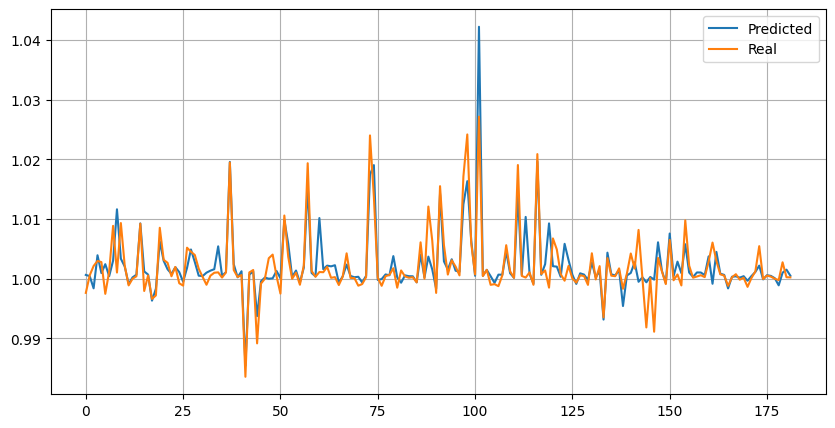

In [13]:
predictions = model.predict(x_test)
plt.figure(figsize=(10,5))
plt.plot(predictions, label='Predicted')
plt.plot(y_test, label='Real')
plt.legend()
plt.grid()
plt.show()